# Neutral Beam Injection
In this notebook we investigate the possibility to heat the plasma by injection high energy neutral beam. Most of the analysis here follow Wesson [1] and Freidberg [2] books

 * [1] J. Wesson, Tokamaks, 3rf ed. (Clarendon Press - Oxford University Press, 2004).
 * [2] J. P. Freidberg, Plasma Physics and Fusion Energy (Cambridge University Press, 2007).

In [1]:
%matplotlib notebook

In [2]:
import io  # for io.StringIo()
import numpy as np
from matplotlib.pyplot import *

## Intro on beam flux and cross section

In [3]:
# TODO

## Energy Required for beam penetration
How much beam energy is required for high energy neutral particles to penetrate to the center of the plasma before being ionized? The derivation depends mainly on the cross sections of ionization processes. 

There are three basic physical mechanisms for a high energy neutral particle $H_b$ to get ionized in a plasma specie $H_p$
 * charge exchange : $H_b + H_p^+ \to H_b^+ + H_p$
 * ionization by ion : $H_b + H_p^+ \to H_b^+ + H_p^+ + e$
 * ionization by electron : $H_b + e \to H_b^+ + 2e$
 
The absorption of the beam depend upon the cross-section for these processes, so first we must find the cross-section data 

### Cross-section Data

Fits from [R. K. Janev, W. D. Langer, J. Post, Douglas E., and J. Evans, Kenneth, Elementary Processes in Hydrogen-Helium Plasmas: Cross Sections and Reaction Rate Coefficients (1987)].

In [4]:
# Janev p253 
PolyCoeffs = {
    'H_2^+ + H_2 -> H_2 + H_2^+': # Reaction 4.3.1
    [ 
        -3.427958758517e+01, # a0
        -7.12148412518e-02,  # a1
        4.690466187943e-02, 
        -8.033946660540e-03,
        -2.265090924593e-03        
        -2.102414848737e-04,
        1.948869487515e-04,
        -2.208124950005e-05,     
        7.262446915488e-07],
    'H_2^+ + H_2 -> H_2^+ + H_2^+ + e': # Reaction 4.3.2
    [
        -2.383489439121e+02,
        2.38436843290e+02,
        -1.263102889116e+02,
        3.746454397894e+01,
        -6.767700946931e+00,
        7.629123486032e-01,
        -5.246096809457e-02,
        2.014116839267e-03,
        -3.310073123768e-05
    ]
}

In [5]:
def sigma_fromPoly(E, a):
    ns = np.arange(len(a))
    ln_sigma = np.sum([a_i*(np.log(E)**n) for (a_i, n) in zip(a, ns)],axis=0)
    return np.exp(ln_sigma)*1e-4 # in m^2

This results in the following figure, which does not match the one found in Wesson and Freidberg book (?)

<IPython.core.display.Javascript object>


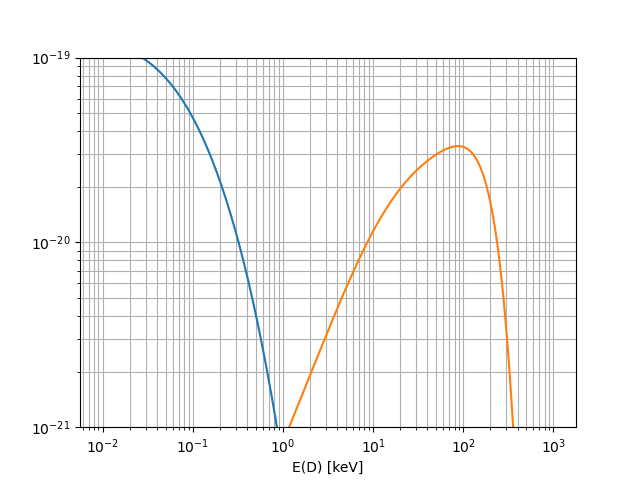

(1e-21, 1e-19)

In [6]:
E = np.logspace(1, 6, num=301)
# charge exchange
sig1 = sigma_fromPoly(E, PolyCoeffs['H_2^+ + H_2 -> H_2 + H_2^+'])
# ionisation by ions
sig2 = sigma_fromPoly(E, PolyCoeffs['H_2^+ + H_2 -> H_2^+ + H_2^+ + e'])

# Both curves do not match Wesson and Freidberg book figures... 
figure()
loglog(E/1e3, sig1)
loglog(E/1e3, sig2)
xlabel('E(D) [keV]')
grid(True)
grid(True, which='minor')
ylim(1e-21, 1e-19)

Below is another tentative with the ONRL Redbook data, but again this does not match well with Wesson and Freidberg book:

<IPython.core.display.Javascript object>


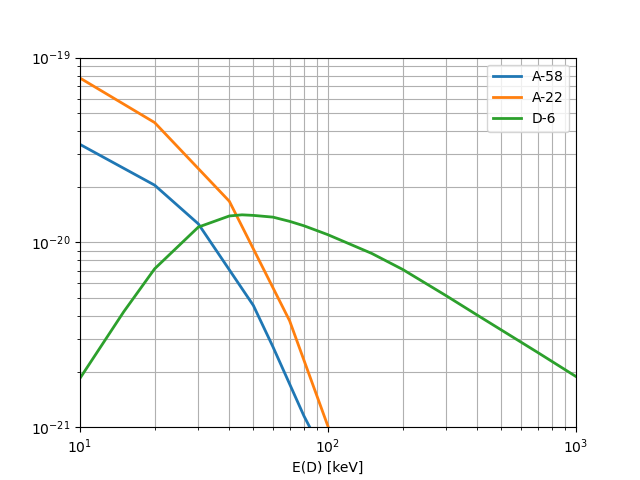

(10, 1000.0)

In [7]:
# Cross sections from C. F. Barnett, Atomic Data for Fusion (1990), aka the "ONRL Redbook"

# H_2^+ + H_2 --> H_2 + H_2^+ (A-58, p.74 ONRL Redbook) 
raw_data = '''
2.0E+00 1.22E-15
4.0E+00 1.12E-15
7.0E+00 1.06E-15
1.0E+01 1.01E-15
2.0E+01 9.21E-16
4.0E+01 7.03E-16
8.0E+01 6.06E-16
1.0E+02 5.64E-16
2.0E+02 4.95E-16
3.0E+02 4.89E-16
6.0E+02 4.96E-16
8.0E+02 5.28E-16
1.0E+03 5.39E-16
2.0E+03 5.49E-16
3.0E+03 5.26E-16
5.0E+03 4.81E-16
8.0E+03 3.86E-16
1.0E+04 3.39E-16
2.0E+04 2.04E-16
3.0E+04 1.26E-16
5.0E+04 4.56E-17
6.0E+04 2.72E-17
8.0E+04 1.15E-17
1.0E+05 6.43E-18
'''
E1, sigma1_cm2 = np.loadtxt(io.StringIO(raw_data), delimiter=' ', unpack=True)

# H^+ + H --> H + H^+ (A-22, p.74 ONRL Redbook) 
raw_data = '''
7.0e1 2.54e-15
1.0e2 2.44e-15
2.0e2 2.22e-15
4.0e2 2.03e-15
7.0e2 1.88e-15
1.0e3 1.71e-15
2.0e3 1.44e-15
4.0e3 1.20e-15
7.0e3 9.42e-16
1.0e4 7.75e-16
2.0e4 4.45e-16
4.0e4 1.67e-16
7.0e4 3.77e-17
1.0e5 1.01e-17
2.0e5 6.09e-19
4.0e5 1.76e-20
6.3e5 1.32e-21
'''
E3, sigma3_cm2 = np.loadtxt(io.StringIO(raw_data), delimiter=' ', unpack=True)

#Ionization Cross Sections for H^+ + H -> H^+ + H^+ + e (ONRL Redbook D-6 p.397)
raw_data='''
9.4E+03 1.62E-17
1.0E+04 1.84E-17
1.5E+04 4.21E-17
2.0E+04 7.20E-17
3.0E+04 1.21E-16
4.0E+04 1.39E-16
4.5E+04 1.41E-16
5.0E+04 1.40E-16
6.0E+04 1.37E-16
7.0E+04 1.30E-16
8.0E+04 1.23E-16
9.0E+04 1.16E-16
1.0E+05 1.10E-16
1.5E+05 8.72E-17
2.0E+05 7.14E-17
3.0E+05 5.14E-17
4.0E+05 4.04E-17
7.0E+05 2.54E-17
1.0E+06 1.88E-17
1.5E+06 1.34E-17
'''
E2, sigma2_cm2 = np.loadtxt(io.StringIO(raw_data), delimiter=' ', unpack=True)

# Again, curves does not exactly match Wesson and Freidberg books...
figure()
loglog(E1/1e3, sigma1_cm2*1e-4, lw=2, label='A-58' )
loglog(E3/1e3, sigma3_cm2*1e-4, lw=2, label='A-22')
loglog(E2/1e3, sigma2_cm2*1e-4, lw=2, label='D-6')
xlabel('E(D) [keV]')
grid(True)
grid(True, which='minor')
ylim(1e-21, 1e-19)
legend()
xlim(10, 1e3)

Finally we use analytical fit from Roubin's thesis, and we get closer results to Wesson & Freidberg books:

In [8]:
# analytical fit from : J. P. Roubin, Etude de l’injection d’atomes Neutres Rapides Dans Le Tokamak T.F.R., Paris-Sud, 1987. 
def sigma_ec(E, A=2): # en cm^2
    # A= 1 pour H^0, 2 pour D^0
    return (0.6937e-14*(1 - 0.155*np.log10(E/A))**2) / (1 + 0.1112e-14 * (E/A)**3.3)

def sigma_i(R, A=2): # en cm^2
    # A= 1 pour H^0, 2 pour D^0
    log10_sigma_i = -0.8712*(np.log10(E/A))**2 + 8.156*np.log10(E/A) - 34.833
    return 10**log10_sigma_i

<IPython.core.display.Javascript object>


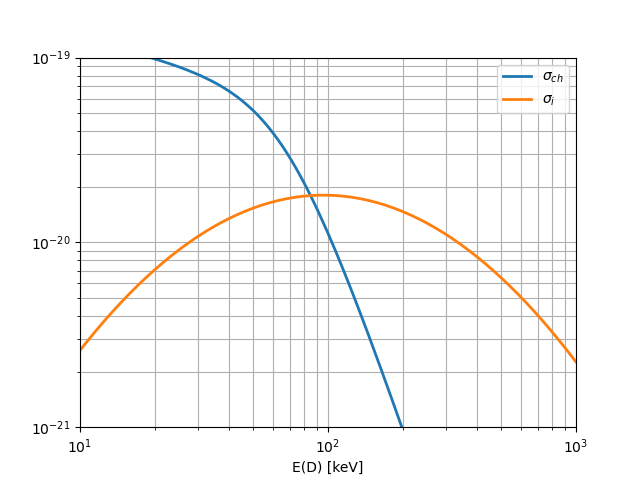

In [9]:
# This time, this is closer than Wesson and Freidberg book.
E = np.logspace(1, 6, num=301)

figure()
loglog(E/1e3, sigma_ec(E)*1e-4, lw=2, label='$\sigma_{ch}$')
loglog(E/1e3, sigma_i(E)*1e-4, lw=2, label='$\sigma_{i}$')

xlim(10, 1e3)
xlabel('E(D) [keV]')
grid(True)
grid(True, which='minor')
ylim(1e-21, 1e-19)
legend()

### Beam Flux Evolution

The beam flux $\Gamma_b = n_b v_b$ evolution is governed by the equation
$$
\frac{d \Gamma_b}{dx}
    =
    -n_p(x) \left(\sigma_{ch} + \sigma_i + \sigma_e \frac{v_e}{v_b} \right) \Gamma_b(x)
$$
where $n_p$ is the background plasma electron and ion density, $\sigma_{ch}$, $\sigma_i$ and $\sigma_e$ the cross sections for charge exchange, ionization  by ion and electron respectively. 

Assuming that the plasma density is relatively flat, $n_p$ is almost constant. The cross section for the ionization by electrons is much lower than the two other, so it will be neglected. 

Hence, the solution of the previous equation is
$$
    \Gamma_b(x)
    =
    \Gamma_b(0) \left(1 - e^{-x\lambda} \right)
$$
where
$$
    \lambda=
    \frac{1}{n_p (\sigma_{ch} + \sigma_i)}
$$

Discussion on the decay length : not to low, not too high. 

If the beam traverse a distance $x=2a$ at 3 decay length, hence $\lambda\approx 2a/3$.

The beam penetration distance in the plasma can be expressed as a combination of density and cross-sections:
$$
d_b = \frac{1.5}{n_p(\sigma_{ch} + \sigma_i)}
$$

<IPython.core.display.Javascript object>


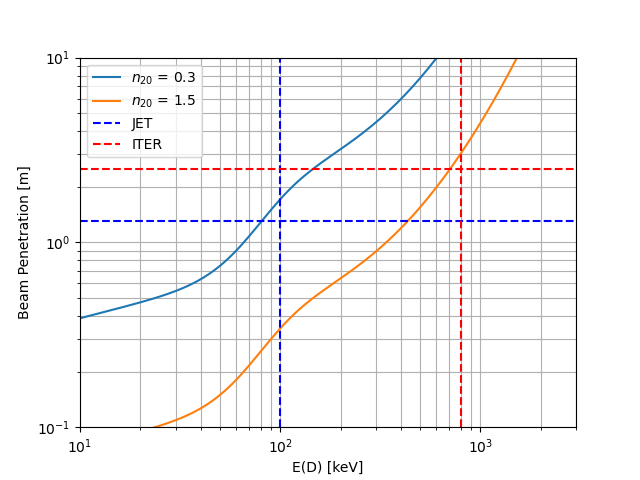

In [10]:
# plot beam penetration vs energie and density
E = np.logspace(1, 7, num=301)
s_ec = sigma_ec(E)*1e-4
s_i = sigma_i(E)*1e-4
n_ps = [0.3e20, 1.5e20] # m^-3

def d_b(n_p):
    return 1.5/(n_p*(s_ec+s_i))

figure()
[loglog(E/1e3, d_b(n_p), label='$n_{20}$ = '+str(n_p/1e20)) for n_p in n_ps]
xlim(10, 3e3)
ylim(1e-1, 10)
xlabel('E(D) [keV]')
ylabel('Beam Penetration [m]')
grid(True)
grid(True, which='minor')
axvline(100, color='b', ls='--', label='JET') # JET
axhline(1.3, color='b', ls='--') # JET
axhline(2.5, color='r', ls='--', label='ITER') # ITER
axvline(800, color='r', ls='--') # ITER
legend()
# give conclusions about NBI system for current tokamak and for future reactor

## Neutralization efficiency


### Positive ions

The evolution of the beam flux as it traverses the neutralizer is
$$
\frac{d\Gamma_b^+}{dx}
    =
    -n_n \sigma_{ch} \Gamma_b^+ + n_n \sigma_i \Gamma_b
$$
The model is closed assuming conservation of beam particles
$$
\Gamma_b^+ + \Gamma_b = \Gamma_0 \doteq \Gamma_b^+ (0)
$$

Cross sections can be supposed as constant if both beam and neutral does not lose much energy as they progress along the neutralizer

This leads to solutions:
$$
    \Gamma_b^+ (x) = \Gamma_0 \left[ \frac{\lambda}{\lambda_i} + \left(1 - \frac{\lambda}{\lambda_i} \right) e^{-x/\lambda} \right]
$$
and 
$$
\Gamma_b (x) = \Gamma_0 \left(1 -  \frac{\lambda}{\lambda_i}\right)\left(1 - e^{-x/\lambda} \right)
$$


with $\lambda_i = 1/n_n \sigma_i$. 

The fraction of neutral particles is thus
$$
f_n = \lim_{x\to\infty} \frac{\Gamma_b}{\Gamma_0} = \frac{\sigma_{ch}}{\sigma_{ch} + \sigma_i}
$$

## Negative Ions

<IPython.core.display.Javascript object>


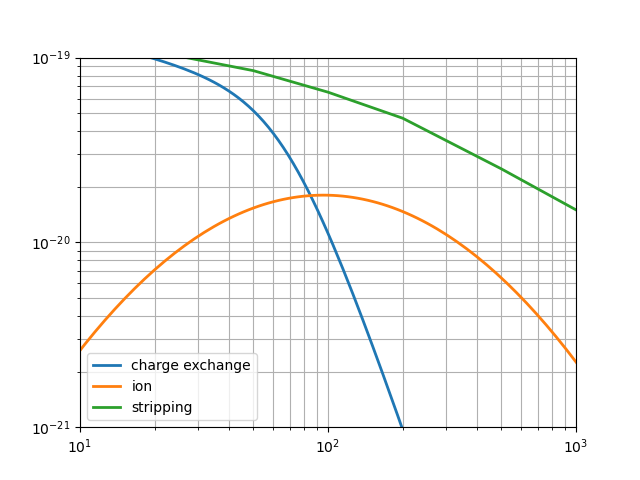

In [11]:
# stripping collision cross section from
# K. H. Berkner, R. V. Pyle, and J. W. Stearns, Nucl. Fusion 15, 249 (1975).
raw_data = '''
10e3 100e-17
20e3 108e-17
50e3 85e-17
100e3 65e-17
200e3 47e-17
500e3 25e-17
1000e3 15e-17
'''

E_s, sigma_s = np.loadtxt(io.StringIO(raw_data), delimiter=' ', unpack=True)

# replot cross section vs Energy figure to compare to Wesson and Freidberg books. Seems fair.
figure()
loglog(E/1e3, s_ec, lw=2, label='charge exchange')
loglog(E/1e3, s_i, lw=2, label='ion')
loglog(E_s/1e3, sigma_s*1e-4, lw=2, label='stripping')
xlim(10, 1e3)
ylim(1e-21, 1e-19)
grid(True)
grid(True, which='minor')
legend()

<IPython.core.display.Javascript object>


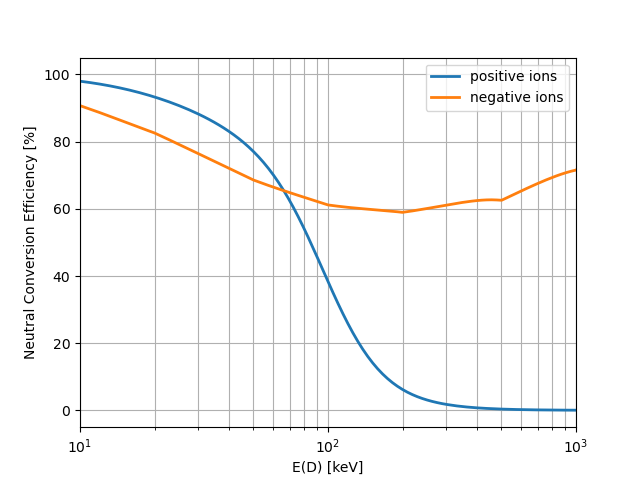

In [12]:
# plot the fraction of neutral particles vs E
figure()
semilogx(E/1e3, 100*s_ec/(s_ec + s_i), lw=2, 
         label='positive ions')

s_s = np.interp(E, E_s, sigma_s*1e-4, )
delta = s_i/s_s
semilogx(E/1e3, 100*delta**(delta/(1-delta)), lw=2, 
         label='negative ions')

xlim(10, 1e3)
xlabel('E(D) [keV]')
ylabel('Neutral Conversion Efficiency [%]')
grid(True)
grid(True, which='minor')
legend()

# discussion on the choice of ion charge for neutralization for a reactor

### Stylin'

In [13]:
from IPython.core.display import HTML

def _set_css_style(css_file_path):
    styles = open(css_file_path, 'r').read()
    s = '<style>%s</style>' % styles
    return HTML(s)
_set_css_style('../custom.css')